In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
import time 
import numpy as np
from selenium import webdriver
aux=pd.DataFrame()
aux.to_excel("df_proyecto.xlsx",index=False)        # | Creamos un documento Excel donde se guardara la informacion de los productos buscados

def Buscador_Precios_FGuadalajara(producto,mypath):         # | Creamos una funcion que buscara medicamentos en Farmacia Guadalajara
    
    path = mypath                                           # | Creamos lo pertinente para que el programa busque en el repectivo Chrome y el URL
    driver=webdriver.Chrome(path)
    url= "https://www.farmaciasguadalajara.com/SearchDisplay?categoryId=&storeId=10151&searchType=1001&catalogId=10052&langId=-24&sType=SimpleSearch&resultCatEntryType=2&showResultsPage=true&searchSource=Q&pageView=&beginIndex=0&pageSize=20&searchTerm="+producto
    driver.get(url)
        
    productos= driver.find_elements_by_class_name("product_info")    # | Este es la clase que almacena toda la informacion del producto
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### Accedemos a los nombres de los productos

    lista_nombres=list()

    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
     
    ### Accedemos a los precios de los productos
    
    lista_precios1=list()

    for i in range(len(productos)):
        try:
            lista_precios1.append(productos[i].find_elements_by_class_name("product_price")[0].text.split("\n"))
        except:
            lista_precios1.append(np.nan)
    
    ### Como los precios salen en una lista juntos, lo separamos en distintas listas
    
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(lista_precios1[i][0])
        except:
            lista_precios.append(np.nan)

    for i in range(len(productos)):
        try:
            lista_promos.append(lista_precios1[i][1])
        except:
            lista_promos.append(np.nan)
    
    
    ### Pasamos toda la informacion de los productos a al documento Excel
    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="Guadalajara"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]
    ### Una vez pasado convertimos la info a flotante y cerramos la ventana de Chrome
    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()
    return df_proyecto

def Buscador_Precios_Selenium_sanpablo(producto,mypath):        # | Creamos una funcion que buscara medicamentos en Farmacia San Pablo
    
    path = mypath                                               # | Creamos lo pertinente para que el programa busque en el repectivo Chrome y el URL
    driver=webdriver.Chrome(path)
    url= "https://www.farmaciasanpablo.com.mx/search/?text="+producto 
    driver.get(url)

    productos= driver.find_elements_by_class_name("item")   # | Este es la clase que almacena toda la informacion del producto
    
    ### accedemos a las urls almacenadas en la variable productos
    
    lista_urls=[]
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### Accedemos a los precios de los productos
    
    lista_precios=[]
    lista_promos=[]
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("item-prize")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("item-prize")[1].text)
        except:
            lista_promos.append(np.nan)

    ### Accedemos a los nombres de los productos    

    lista_nombres=[]
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
    
    ### Pasamos toda la informacion de los productos a al documento Excel

    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="San Pablo"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]
    
    
    ### Una vez pasado convertimos la info a flotante y cerramos la ventana de Chrome
    
    df_proyecto = df_proyecto[df_proyecto["Nombre"].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_proyecto  =df_proyecto.reset_index(drop=True)
    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()
    return df_proyecto


def Buscador_Precios_Selenium_FAhorro(producto,mypath):              # | Creamos una funcion que buscara medicamentos en Farmacia Del Ahorro
    path = mypath
    driver=webdriver.Chrome(path)
    url= "https://www.fahorro.com/catalogsearch/result/?q="+producto        # | Creamos lo pertinente para que el programa busque en el repectivo Chrome y el URL
    driver.get(url)
    
    productos= driver.find_elements_by_class_name("product-item-info") # | Este es la clase que almacena toda la informacion del producto

    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    ### Accedemos a los nombres de los productos 
    
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
    
    ### Accedemos a los precios de los productos
    
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price")[1].text)
        except:
            lista_promos.append(np.nan)
    
    ### Pasamos toda la informacion de los productos a al documento Excel
    
    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="Del Ahorro"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]

    ### Una vez pasado convertimos la info a flotante y cerramos la ventana de Chrome

    df_proyecto = df_proyecto[df_proyecto["Nombre"].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_proyecto  =df_proyecto.reset_index(drop=True)

    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()

    return df_proyecto




def precios_floats(datos):                                                              # | Creamos una funcion que convertira la infromacion en flotantes
    
    ### Iteramos sobre la informacion convirtiendola en flotantes
    
    for i in range(len(datos["Precio con descuento"])):
        try:
            datos["Precio con descuento"].iloc[i]=datos["Precio con descuento"].iloc[i].strip("$MXN")
        except:
            pass
        
    for i in range(len(datos["Precio"])):
        try:
            datos["Precio"].iloc[i]=datos["Precio"].iloc[i].strip("$MXN")
        except:
            pass
    ###  Guardamos la nueva informacion en el documento Excel 
    
    datos["Precio con descuento"]=datos["Precio con descuento"].replace(",","",regex=True)
    datos["Precio"]=datos["Precio"].replace(",","",regex=True)
      
    datos['Precio con descuento'] = pd.to_numeric(datos['Precio con descuento'], errors='coerce')
    datos['Precio'] = pd.to_numeric(datos['Precio'], errors='coerce')

    datos.to_excel("df_proyectobien.xlsx",index=False)
    return ldatos

    
    

def Precios(path):    # | Creamos una funcion que hara llamar la funciones anteriores ademas de graficar los precios
    for productos in ["PARACETAMOL 500 MG", "CLONAZEPAM","VIAGRA", "IBUPROFENO 400 MG"]:   # | Medicamentos a buscar
        Buscador_Precios_FGuadalajara(productos,path)
        Buscador_Precios_Selenium_sanpablo(productos,path)
        Buscador_Precios_Selenium_FAhorro(productos,path)
    
    ### Graficamos la diferencia de precios de los medicamentos mas baratos encontrados entre las farmacias
    
    fig, ax = plt.subplots()
    plt.bar(range(3), [38, 15, 35], color=["red","blue","grey"],align='center')
    plt.title("Comparación del menor precio Ibuprofeno",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(range(3), [20, 5.5, 9.5], color=["red","blue","grey"],align='center')
    plt.title("Comparación del menor precio Paracetamol",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(range(3), [79, 63, 94], color=["red","blue","grey"],align='center')
    plt.title("Comparación del menor precio Clonazepam",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()

    fig, ax = plt.subplots()
    plt.bar(range(3), [225, 216, 205], color=["red","blue","grey"],align='center')
    plt.title("Comparación del menor precio Viagra",fontsize=20)
    names = ["Ahorro","Guadalajara","San Pablo"]
    ax.set_xticks(range(3))
    ax.set_xticklabels(names)
    plt.show()   


C:\Users\DIEGO\AppData\Local\Temp/ipykernel_21292/1116304883.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\DIEGO\AppData\Local\Temp/ipykernel_21292/1116304883.py:19: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product_info")    # | Este es la clase que almacena toda la informacion del producto
C:\Users\DIEGO\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\DIEGO\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are depreca

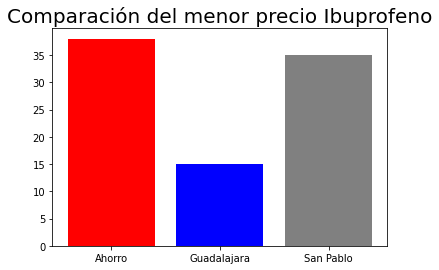

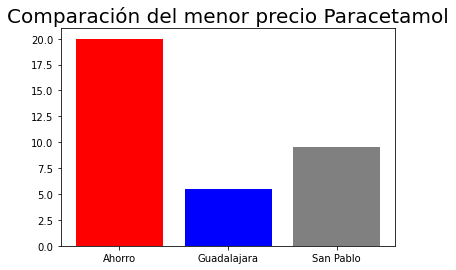

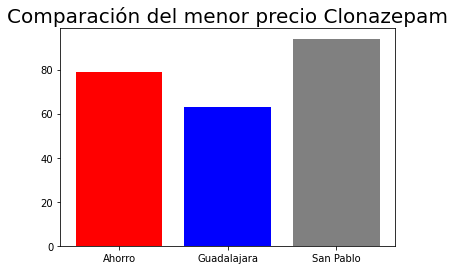

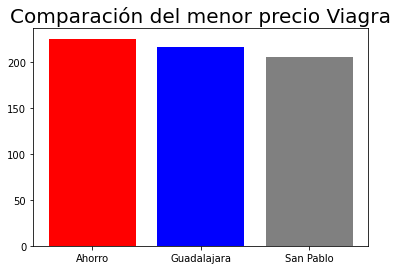

In [2]:
# | Direccion donde este guardado el Chrome Driver Ejemplo: "C:\WebDriver\chromedriver.exe"
Precios("C:\WebDriver\chromedriver.exe")
df_proyecto=pd.read_excel("df_proyecto.xlsx")  
 

In [3]:
df_proyecto

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$229.80,$60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$35.51,$14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$22.00,$5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$10.00 MXN,NaN
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$9.50 MXN,NaN
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,$97.00 MXN,NaN
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.50 MXN,NaN
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$26.00 MXN,NaN
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.00 MXN,NaN
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,$94.00,NaN


In [4]:
#Esta consulta nos limita a 10 resultados 
ps.sqldf("select  * from df_proyecto where (Medicamento= 'PARACETAMOL 500 MG') limit 10")#SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$229.80,$60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$35.51,$14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$22.00,$5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$10.00 MXN,None
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$9.50 MXN,None
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,$97.00 MXN,None
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.50 MXN,None
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$26.00 MXN,None
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.00 MXN,None
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,$94.00,None


In [5]:
#Esta consulta nos muestra los medicamentos de todas las farmacias con precio menor a 150 pesos
ps.sqldf("select *  from df_proyecto where  Precio <150  ") #SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$229.80,$60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$35.51,$14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$22.00,$5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$10.00 MXN,None
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$9.50 MXN,None
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,$97.00 MXN,None
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.50 MXN,None
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$26.00 MXN,None
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.00 MXN,None
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,$94.00,None


In [6]:
#Esta consulta nos muestra todos los medicamentos de la farmacia Guadalajara
ps.sqldf("select  * from df_proyecto where (Farmacia = 'Guadalajara') ")#si

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$229.80,$60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$35.51,$14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$22.00,$5.50
3,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$392.05,$81.00
4,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/ProductDis...,$254.00,$203.20
5,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$720.00,$62.93
6,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2.5mg 10ml Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$491.40,$101.52
7,27/01/22,Guadalajara,CLONAZEPAM,Kriadex 2.5mg/1ml 10ml Solución,http://www.farmaciasguadalajara.com/es/farmaci...,$254.00,$203.20
8,27/01/22,Guadalajara,CLONAZEPAM,Klodex 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$690.00,$116.47
9,27/01/22,Guadalajara,CLONAZEPAM,Rivotril Solución 2.5mg/ml 10ml Gotero,http://www.farmaciasguadalajara.com/es/farmaci...,$608.00,$486.40


In [7]:
#Esta consulta nos muestra un medicamento de dos de las farmacias
ps.sqldf("select  * from df_proyecto where (Medicamento= 'PARACETAMOL 500 MG') and ((Farmacia = 'Guadalajara') or (Farmacia = 'San Pablo'))") #SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$229.80,$60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$35.51,$14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$22.00,$5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$10.00 MXN,None
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$9.50 MXN,None
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,$97.00 MXN,None
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.50 MXN,None
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$26.00 MXN,None
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.00 MXN,None


In [8]:
##Esta consulta nos muestra el promedio de los medicamentos
ps.sqldf("select Medicamento,avg(Precio) as preciopromedio from df_proyecto group by Medicamento ")#si

,Medicamento,preciopromedio
0,CLONAZEPAM,0.0
1,IBUPROFENO 400 MG,0.0
2,PARACETAMOL 500 MG,0.0
3,VIAGRA,0.0


In [9]:
#Esta consulta nos muestra un Medicamento de cada farmacia
ps.sqldf("select  * from df_proyecto where ((Medicamento= 'VIAGRA') and (Farmacia = 'Guadalajara'))  or ((Medicamento= 'CLONAZEPAM') and (Farmacia = 'Del Ahorro')) or ((Medicamento= 'IBUPROFENO 400 MG') and (Farmacia = 'San Pablo'))") #SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Del Ahorro,CLONAZEPAM,MARCA DEL AHORRO CLONAZEPAM 2MG 30TABLETAS,https://www.fahorro.com/marca-del-ahorro-clona...,$79.00,None
1,27/01/22,Guadalajara,VIAGRA,Viagra 100mg 1 Tableta,http://www.farmaciasguadalajara.com/es/farmaci...,$330.80,$216.67
2,27/01/22,Guadalajara,VIAGRA,Viagra 100mg 4 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,"$1,092.29",$715.45
3,27/01/22,Guadalajara,VIAGRA,Viagra Jet 50mg 1 Tableta Masticable,http://www.farmaciasguadalajara.com/es/farmaci...,$314.62,$169.01
4,27/01/22,Guadalajara,VIAGRA,Viagra Jet 100mg 4 Tabletas Masticables,http://www.farmaciasguadalajara.com/es/farmaci...,"$1,164.61",$625.86
5,27/01/22,Guadalajara,VIAGRA,Viagra Jet 100mg 2 Tabletas Masticables,http://www.farmaciasguadalajara.com/es/farmaci...,$646.01,$346.97
6,27/01/22,Guadalajara,VIAGRA,Viagra 100mg 2 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$549.12,$365.16
7,27/01/22,Guadalajara,VIAGRA,Viagra 50mg 1 Tableta,http://www.farmaciasguadalajara.com/es/farmaci...,$297.72,$195.01
8,27/01/22,San Pablo,IBUPROFENO 400 MG,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,$35.00 MXN,None
9,27/01/22,San Pablo,IBUPROFENO 400 MG,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,$35.00 MXN,None


In [10]:
#Esta consulta nos muestra los Medicamentos de dos farmacias con precio menor a 100 pesos
ps.sqldf("select  * from df_proyecto where (Precio< 100) and ((Farmacia = 'Guadalajara') or (Farmacia = 'San Pablo'))") #SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$229.80,$60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$35.51,$14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,$22.00,$5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$10.00 MXN,None
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,$9.50 MXN,None
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,$97.00 MXN,None
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.50 MXN,None
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,$26.00 MXN,None
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,$32.00 MXN,None
9,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,$392.05,$81.00
